In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)
n_fans = 10000

ticket_types = ["digital", "physical"]
merch_items = ["jersey", "hat", "scarf", "hoodie"]
renewal_risks = ["low", "medium", "high"]
loyalty_statuses = ["loyal", "fading"]
arrival_buckets = ["early", "just_before_game", "late"]
transport_modes = ["car", "public_transit", "rideshare", "walk", "bike"]

owner_q_data = {
    "fan_id": np.arange(1, n_fans + 1),

    # core experience ratings
    "wifi_app_1to5": np.random.randint(1, 6, size=n_fans),
    "hype_1to5": np.random.randint(1, 6, size=n_fans),
    "seat_comfort_1to5": np.random.randint(1, 6, size=n_fans),
    "bathroom_cleanliness_1to5": np.random.randint(1, 6, size=n_fans),
    "navigation_ease_1to5": np.random.randint(1, 6, size=n_fans),
    "parking_price_fairness_1to5": np.random.randint(1, 6, size=n_fans),
    "traffic_impact_1to5": np.random.randint(1, 6, size=n_fans),
    "in_app_features_1to5": np.random.randint(1, 6, size=n_fans),
    "security_safety_1to5": np.random.randint(1, 6, size=n_fans),
    "feel_appreciated_1to5": np.random.randint(1, 6, size=n_fans),
    "lines_too_long_1to5": np.random.randint(1, 6, size=n_fans),

    # extra things you wanted
    "weather_protection_1to5": np.random.randint(1, 6, size=n_fans),       # sun/rain
    "seat_value_for_money_1to5": np.random.randint(1, 6, size=n_fans),     # seat value
    "food_price_fairness_1to5": np.random.randint(1, 6, size=n_fans),      # food/drink prices
    "player_meetings_interest_1to5": np.random.randint(1, 6, size=n_fans), # player-fan events

    # tickets / merch / loyalty
    "ticket_type_preference": np.random.choice(ticket_types, size=n_fans, p=[0.8, 0.2]),
    "top_merch_item": np.random.choice(merch_items, size=n_fans, p=[0.5, 0.2, 0.15, 0.15]),
    "renewal_risk": np.random.choice(renewal_risks, size=n_fans, p=[0.4, 0.35, 0.25]),
    "loyalty_status": np.random.choice(loyalty_statuses, size=n_fans, p=[0.7, 0.3]),

    # logistics
    "arrival_time_bucket": np.random.choice(arrival_buckets, size=n_fans, p=[0.3, 0.5, 0.2]),
    "transport_mode": np.random.choice(transport_modes, size=n_fans, p=[0.55, 0.15, 0.15, 0.1, 0.05]),
    "commute_distance_km": np.random.randint(1, 81, size=n_fans),  # 1–80 km

    # reactions to scenarios
    "scenario_winning_sentiment_1to5": np.random.randint(3, 6, size=n_fans),
    "scenario_losing_sentiment_1to5": np.random.randint(1, 5, size=n_fans),
    "scenario_big_trade_sentiment_1to5": np.random.randint(1, 6, size=n_fans),
}

owner_q_df = pd.DataFrame(owner_q_data)
owner_q_df.head(), len(owner_q_df)


(   fan_id  wifi_app_1to5  hype_1to5  seat_comfort_1to5  \
 0       1              4          2                  2   
 1       2              5          4                  1   
 2       3              3          5                  1   
 3       4              5          4                  1   
 4       5              5          4                  3   
 
    bathroom_cleanliness_1to5  navigation_ease_1to5  \
 0                          2                     2   
 1                          2                     3   
 2                          4                     1   
 3                          2                     2   
 4                          4                     1   
 
    parking_price_fairness_1to5  traffic_impact_1to5  in_app_features_1to5  \
 0                            3                    1                     3   
 1                            3                    3                     3   
 2                            3                    4                     5   


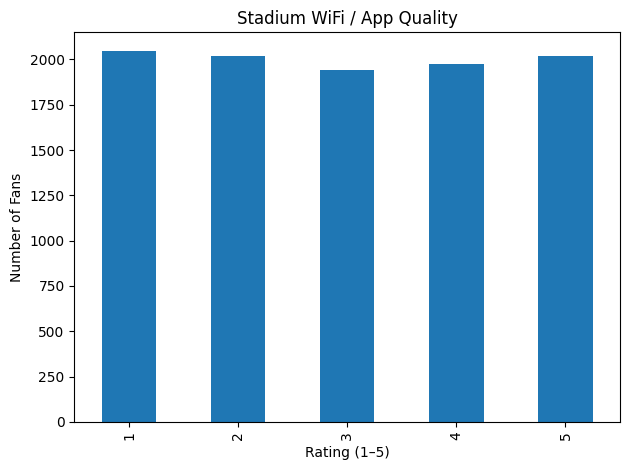

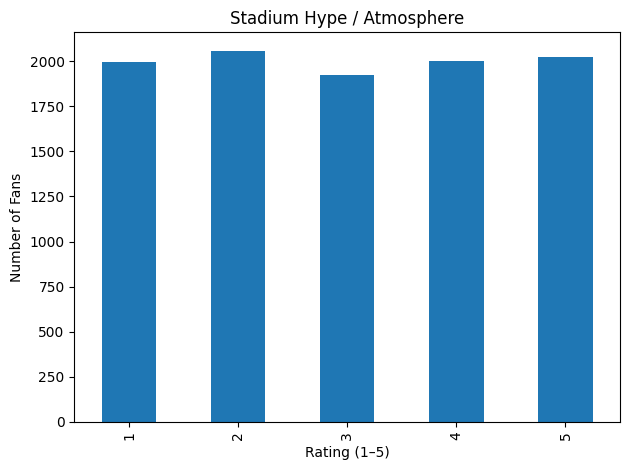

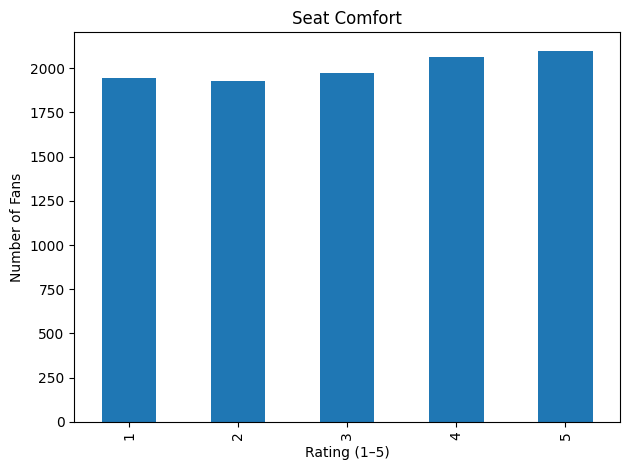

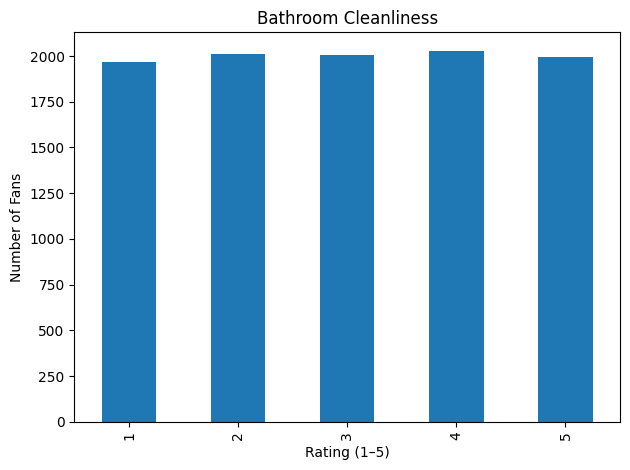

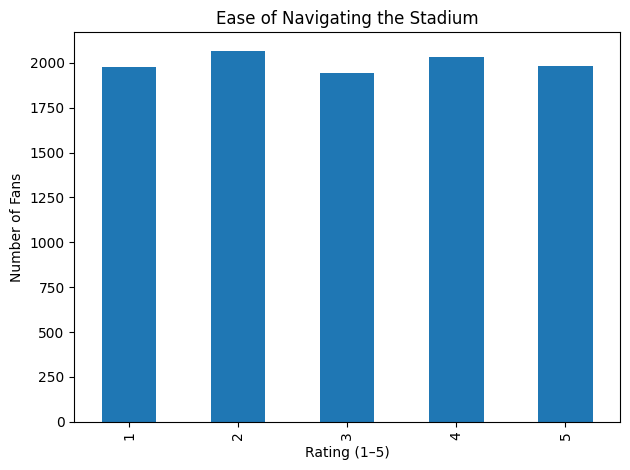

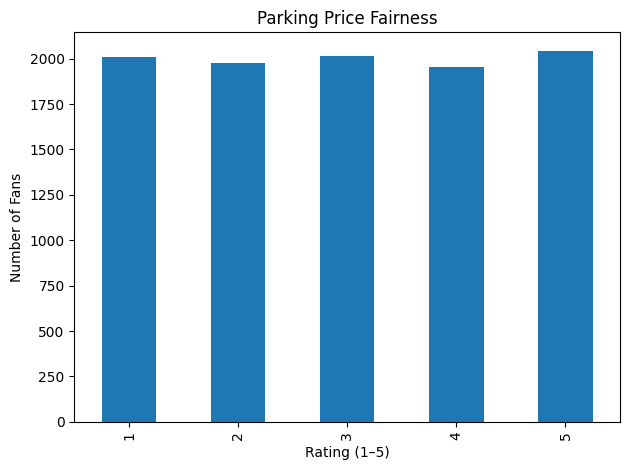

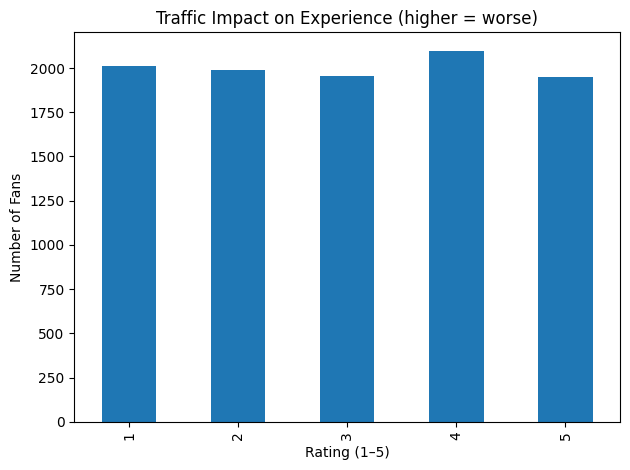

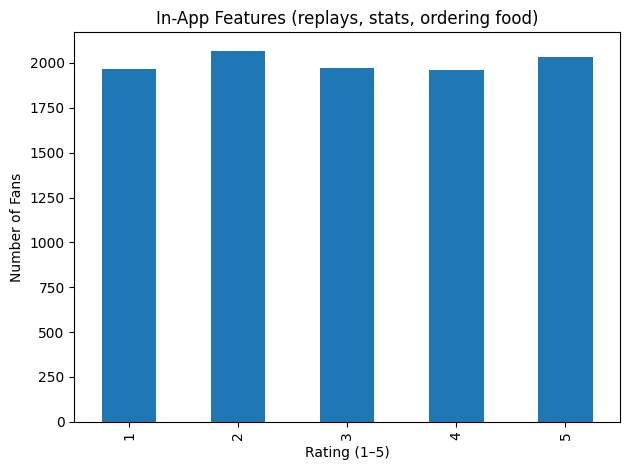

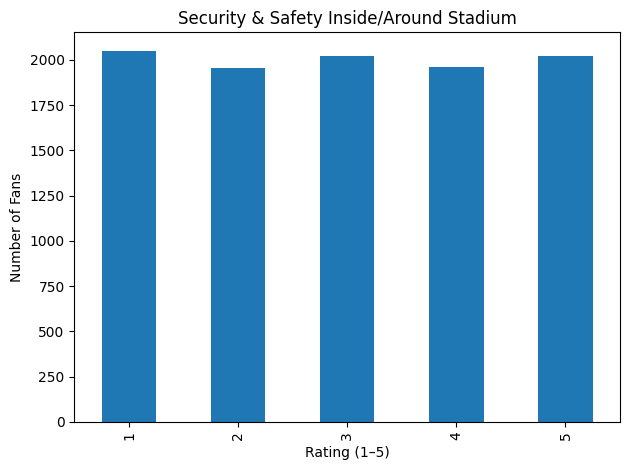

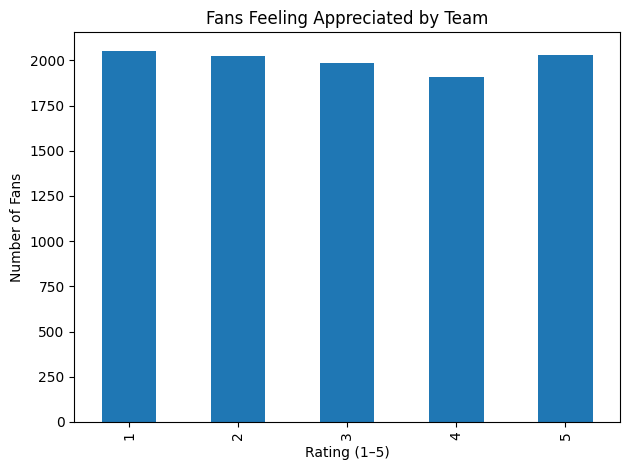

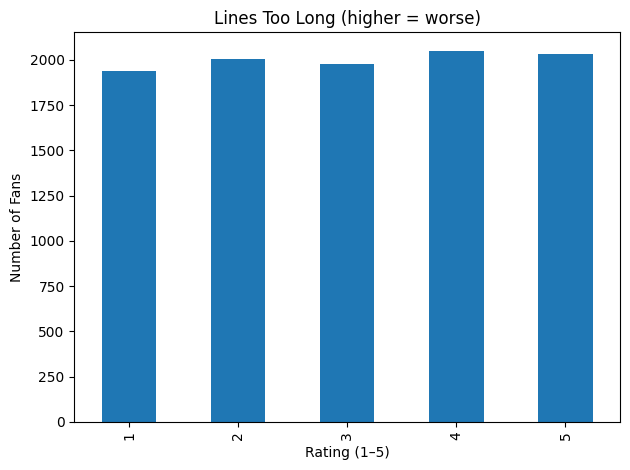

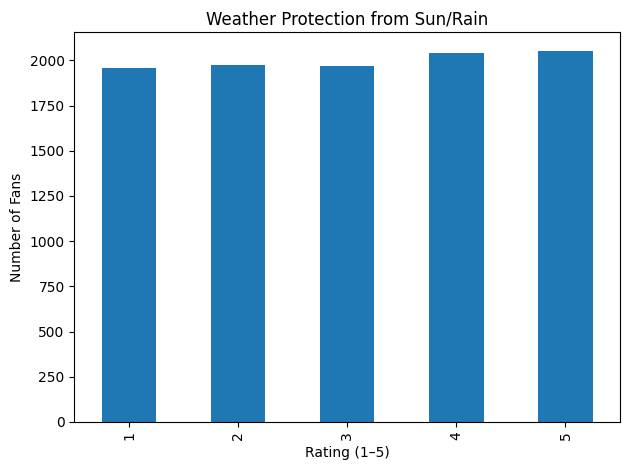

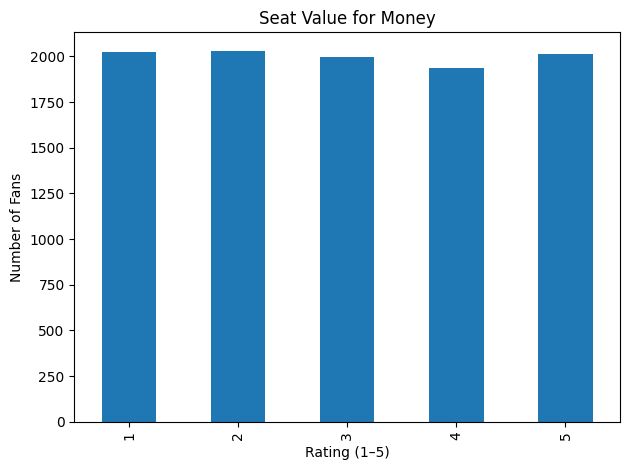

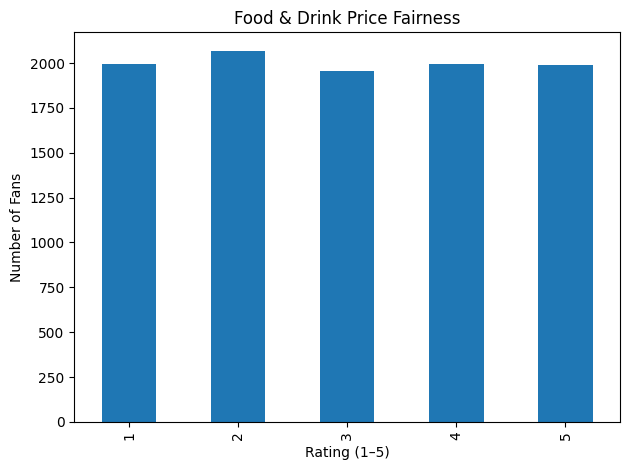

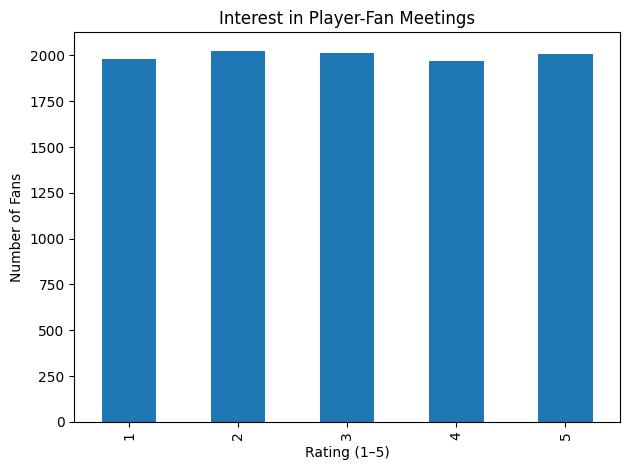

In [ ]:
# EXPERIENCE RATING CHARTS (1–5)

rating_columns = {
    "Stadium WiFi / App Quality": "wifi_app_1to5",
    "Stadium Hype / Atmosphere": "hype_1to5",
    "Seat Comfort": "seat_comfort_1to5",
    "Bathroom Cleanliness": "bathroom_cleanliness_1to5",
    "Ease of Navigating the Stadium": "navigation_ease_1to5",
    "Parking Price Fairness": "parking_price_fairness_1to5",
    "Traffic Impact on Experience (higher = worse)": "traffic_impact_1to5",
    "In-App Features (replays, stats, ordering food)": "in_app_features_1to5",
    "Security & Safety Inside/Around Stadium": "security_safety_1to5",
    "Fans Feeling Appreciated by Team": "feel_appreciated_1to5",
    "Lines Too Long (higher = worse)": "lines_too_long_1to5",
    "Weather Protection from Sun/Rain": "weather_protection_1to5",
    "Seat Value for Money": "seat_value_for_money_1to5",
    "Food & Drink Price Fairness": "food_price_fairness_1to5",
    "Interest in Player-Fan Meetings": "player_meetings_interest_1to5"
}

for question, col in rating_columns.items():
    plt.figure()
    owner_q_df[col].value_counts().sort_index().plot(kind="bar")
    plt.title(question)
    plt.xlabel("Rating (1–5)")
    plt.ylabel("Number of Fans")
    plt.tight_layout()
    plt.show()


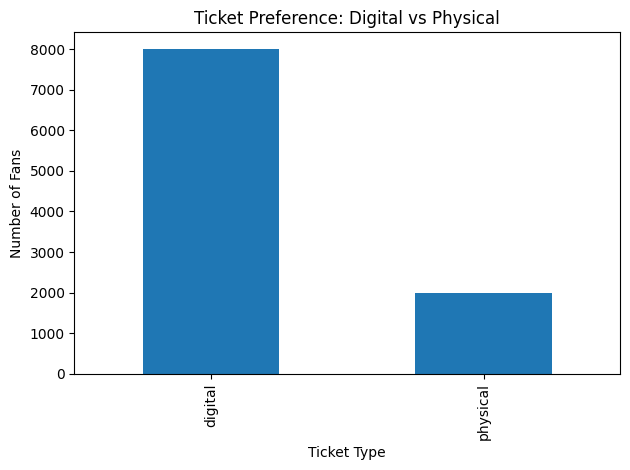

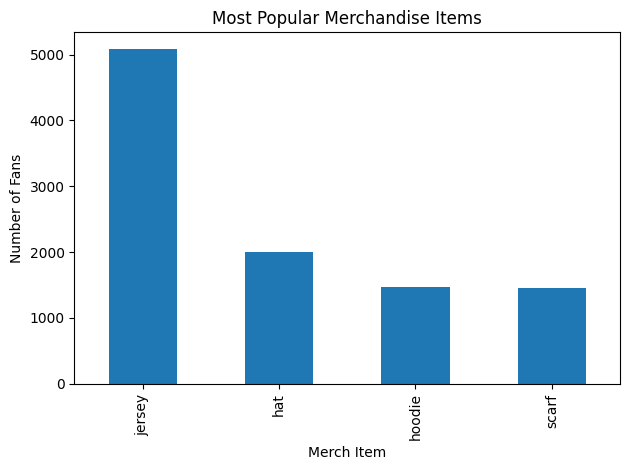

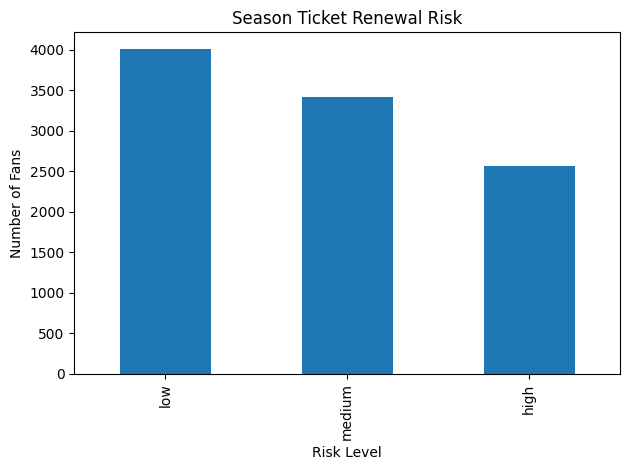

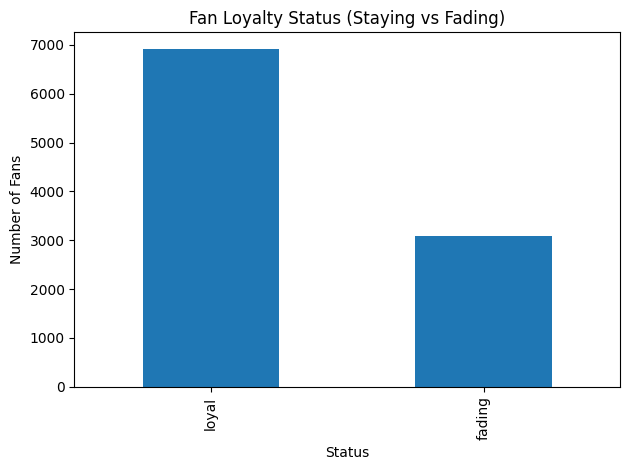

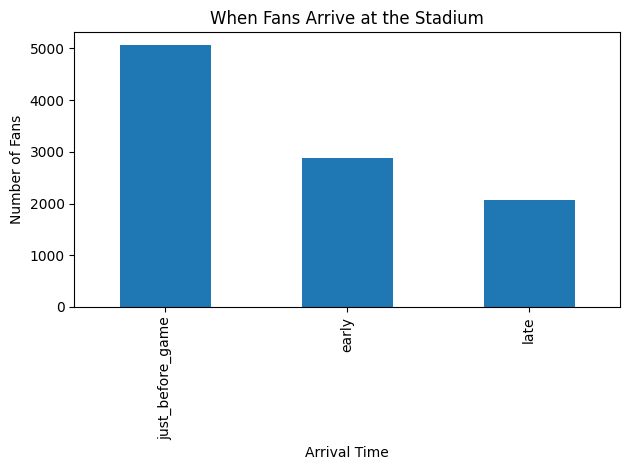

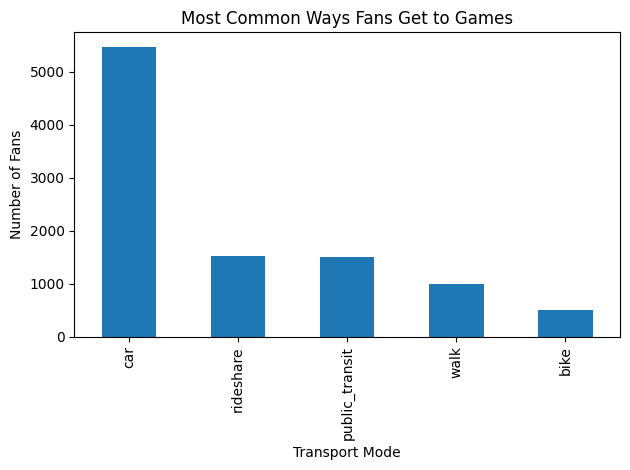

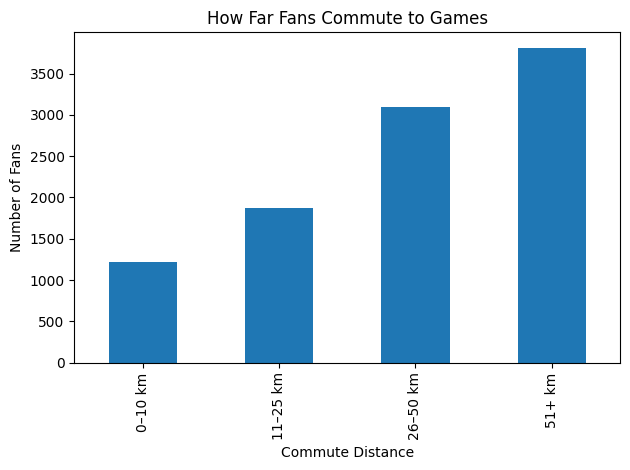

In [ ]:
# CATEGORICAL / LOGISTICS CHARTS

# Ticket preference
plt.figure()
owner_q_df["ticket_type_preference"].value_counts().plot(kind="bar")
plt.title("Ticket Preference: Digital vs Physical")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Fans")
plt.tight_layout()
plt.show()

# Top merch items
plt.figure()
owner_q_df["top_merch_item"].value_counts().plot(kind="bar")
plt.title("Most Popular Merchandise Items")
plt.xlabel("Merch Item")
plt.ylabel("Number of Fans")
plt.tight_layout()
plt.show()

# Renewal risk
plt.figure()
owner_q_df["renewal_risk"].value_counts().plot(kind="bar")
plt.title("Season Ticket Renewal Risk")
plt.xlabel("Risk Level")
plt.ylabel("Number of Fans")
plt.tight_layout()
plt.show()

# Loyalty status
plt.figure()
owner_q_df["loyalty_status"].value_counts().plot(kind="bar")
plt.title("Fan Loyalty Status (Staying vs Fading)")
plt.xlabel("Status")
plt.ylabel("Number of Fans")
plt.tight_layout()
plt.show()

# Arrival times
plt.figure()
owner_q_df["arrival_time_bucket"].value_counts().plot(kind="bar")
plt.title("When Fans Arrive at the Stadium")
plt.xlabel("Arrival Time")
plt.ylabel("Number of Fans")
plt.tight_layout()
plt.show()

# Transport mode
plt.figure()
owner_q_df["transport_mode"].value_counts().plot(kind="bar")
plt.title("Most Common Ways Fans Get to Games")
plt.xlabel("Transport Mode")
plt.ylabel("Number of Fans")
plt.tight_layout()
plt.show()

# Commute distance grouped
distance_bins = [0, 10, 25, 50, 100]
distance_labels = ["0–10 km", "11–25 km", "26–50 km", "51+ km"]
owner_q_df["commute_bucket"] = pd.cut(owner_q_df["commute_distance_km"],
                                      bins=distance_bins,
                                      labels=distance_labels,
                                      include_lowest=True)

plt.figure()
owner_q_df["commute_bucket"].value_counts().sort_index().plot(kind="bar")
plt.title("How Far Fans Commute to Games")
plt.xlabel("Commute Distance")
plt.ylabel("Number of Fans")
plt.tight_layout()
plt.show()


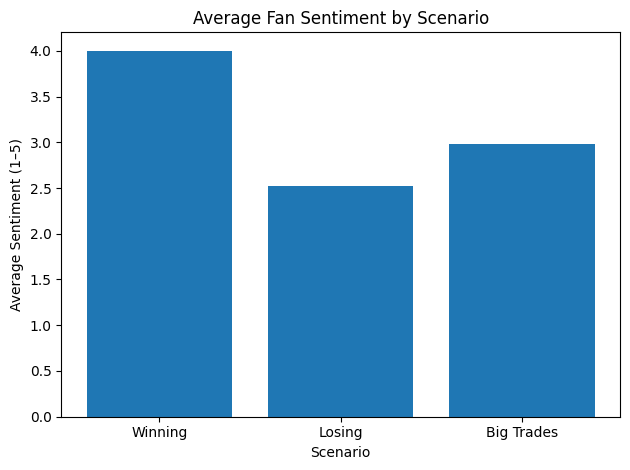

In [ ]:
# REACTIONS TO WINNING / LOSING / BIG TRADES

scenario_means = {
    "Winning": owner_q_df["scenario_winning_sentiment_1to5"].mean(),
    "Losing": owner_q_df["scenario_losing_sentiment_1to5"].mean(),
    "Big Trades": owner_q_df["scenario_big_trade_sentiment_1to5"].mean()
}

plt.figure()
plt.bar(scenario_means.keys(), scenario_means.values())
plt.title("Average Fan Sentiment by Scenario")
plt.xlabel("Scenario")
plt.ylabel("Average Sentiment (1–5)")
plt.tight_layout()
plt.show()


In [ ]:
# OWNER Q&A "CHATBOT" – uses the dataset to answer questions

def summarize_experience():
    avg = owner_q_df[[
        "wifi_app_1to5", "hype_1to5", "seat_comfort_1to5",
        "bathroom_cleanliness_1to5", "navigation_ease_1to5",
        "parking_price_fairness_1to5", "traffic_impact_1to5",
        "in_app_features_1to5", "security_safety_1to5",
        "feel_appreciated_1to5", "lines_too_long_1to5",
        "weather_protection_1to5", "seat_value_for_money_1to5",
        "food_price_fairness_1to5", "player_meetings_interest_1to5"
    ]].mean()

    lines = []
    lines.append("Fan experience scores (1–5, higher is better except traffic/lines):")
    for name, val in avg.items():
        lines.append(f"- {name}: {val:.2f}")
    return "\n".join(lines)


def summarize_logistics():
    lines = []
    # commute
    distance_bins = [0, 10, 25, 50, 100]
    distance_labels = ["0–10 km", "11–25 km", "26–50 km", "51+ km"]
    commute_bucket = pd.cut(owner_q_df["commute_distance_km"],
                            bins=distance_bins,
                            labels=distance_labels,
                            include_lowest=True)
    lines.append("Commute distances:")
    lines.append(str(commute_bucket.value_counts().sort_index()))
    lines.append("\nTransport modes:")
    lines.append(str(owner_q_df["transport_mode"].value_counts()))
    lines.append("\nArrival times:")
    lines.append(str(owner_q_df["arrival_time_bucket"].value_counts()))
    lines.append("\nTraffic impact (1–5, higher = worse): "
                 f"{owner_q_df['traffic_impact_1to5'].mean():.2f}")
    lines.append("Parking fairness (1–5): "
                 f"{owner_q_df['parking_price_fairness_1to5'].mean():.2f}")
    return "\n".join(lines)


def owner_improvement_report():
    avg = owner_q_df.mean(numeric_only=True)
    lines = []
    lines.append("Here’s what you can do better as an owner:")

    if avg["bathroom_cleanliness_1to5"] < 3:
        lines.append("- Improve bathroom cleanliness — a major pain point.")
    if avg["parking_price_fairness_1to5"] < 3:
        lines.append("- Lower or bundle parking prices; fans see them as unfair.")
    if avg["food_price_fairness_1to5"] < 3:
        lines.append("- Adjust food & drink pricing or add value meals.")
    if avg["feel_appreciated_1to5"] < 3.5:
        lines.append("- Increase loyalty perks and thank-you moments; fans don’t fully feel appreciated.")
    if avg["lines_too_long_1to5"] > 3:
        lines.append("- Lines are too long; add staff, self-checkout, or mobile ordering.")
    if avg["wifi_app_1to5"] < 3:
        lines.append("- Invest in better stadium WiFi and app stability.")
    if avg["seat_comfort_1to5"] < 3:
        lines.append("- Upgrade seats or cushions in low-scoring sections.")
    if avg["weather_protection_1to5"] < 3:
        lines.append("- Add better shade / roof / cover to protect fans from sun and rain.")

    # loyalty / renewals
    renew_counts = owner_q_df["renewal_risk"].value_counts().to_dict()
    loyalty_counts = owner_q_df["loyalty_status"].value_counts().to_dict()
    lines.append(f"- Season ticket renewal risk: {renew_counts}")
    lines.append(f"- Loyalty status (loyal vs fading): {loyalty_counts}")

    return "\n".join(lines)


def content_and_perks_ideas():
    lines = []
    lines.append("Content & perks ideas from fan data:")

    lines.append("\nTicket preferences:")
    lines.append(str(owner_q_df["ticket_type_preference"].value_counts()))

    lines.append("\nMost popular merch items:")
    lines.append(str(owner_q_df["top_merch_item"].value_counts()))

    avg_player_meet = owner_q_df["player_meetings_interest_1to5"].mean()
    lines.append(f"\nInterest in player-fan meetings (1–5): {avg_player_meet:.2f}")
    if avg_player_meet >= 3.5:
        lines.append("- Fans would love more player meet & greets, autograph sessions, or Q&A events.")
    else:
        lines.append("- Player-fan meetings are nice-to-have, not a primary driver right now.")

    # app features
    lines.append(f"\nIn-app features rating (1–5): {owner_q_df['in_app_features_1to5'].mean():.2f}")
    lines.append("- Consider pushing in-app replays, stats, and maybe in-seat ordering.")

    return "\n".join(lines)


def scenario_summary():
    scenario_means = {
        "Winning": owner_q_df["scenario_winning_sentiment_1to5"].mean(),
        "Losing": owner_q_df["scenario_losing_sentiment_1to5"].mean(),
        "Big Trades": owner_q_df["scenario_big_trade_sentiment_1to5"].mean()
    }
    lines = ["Average fan sentiment (1–5) by scenario:"]
    for k, v in scenario_means.items():
        lines.append(f"- {k}: {v:.2f}")
    return "\n".join(lines)


def owner_answer(question: str):
    q = question.lower()

    if "overall" in q or "how are fans feeling" in q or "summary" in q:
        print(summarize_experience())

    elif "better" in q or "improve" in q or "what can i do" in q or "owner" in q:
        print(owner_improvement_report())

    elif "ticket" in q:
        print("Ticket preferences (digital vs physical):")
        print(owner_q_df["ticket_type_preference"].value_counts())

    elif "merch" in q or "jersey" in q or "clothing" in q:
        print("Most popular merchandise items:")
        print(owner_q_df["top_merch_item"].value_counts())

    elif "loyal" in q or "fading" in q or "renew" in q:
        print("Loyalty status:")
        print(owner_q_df["loyalty_status"].value_counts())
        print("\nRenewal risk:")
        print(owner_q_df["renewal_risk"].value_counts())

    elif ("arrive" in q or "arrival" in q or "commute" in q or
          "transport" in q or "parking" in q or "traffic" in q):
        print(summarize_logistics())

    elif "weather" in q or "sun" in q or "rain" in q:
        print(f"Weather protection rating (1–5): {owner_q_df['weather_protection_1to5'].mean():.2f}")

    elif "food" in q or "drink" in q or "concession" in q or "prices" in q:
        print(f"Food & drink price fairness (1–5): {owner_q_df['food_price_fairness_1to5'].mean():.2f}")

    elif "meeting" in q or "meetings" in q or "players" in q:
        print(content_and_perks_ideas())

    elif "winning" in q or "losing" in q or "trades" in q:
        print(scenario_summary())

    else:
        print("Try asking about: overall experience, how to improve as an owner, "
              "tickets, merch, loyalty/renewals, commute/transport, weather protection, "
              "food prices, player meetings, or reactions to winning/losing/trades.")


In [ ]:
# DEMO SAMPLE QUESTIONS FOR OWNER CHATBOT

owner_answer("How are fans feeling overall?")
print("\n" + "="*70 + "\n")

owner_answer("What can I do better as an owner?")
print("\n" + "="*70 + "\n")

owner_answer("How far are fans commuting and how do they get to games?")
print("\n" + "="*70 + "\n")

owner_answer("Are food and drink prices okay?")
print("\n" + "="*70 + "\n")

owner_answer("Do fans want more player-fan meetings?")
print("\n" + "="*70 + "\n")

owner_answer("Are fans loyal or fading away? What is renewal risk?")
print("\n" + "="*70 + "\n")

owner_answer("How do fans respond during losing and big trades?")


Fan experience scores (1–5, higher is better except traffic/lines):
- wifi_app_1to5: 2.99
- hype_1to5: 3.00
- seat_comfort_1to5: 3.04
- bathroom_cleanliness_1to5: 3.01
- navigation_ease_1to5: 3.00
- parking_price_fairness_1to5: 3.00
- traffic_impact_1to5: 3.00
- in_app_features_1to5: 3.00
- security_safety_1to5: 2.99
- feel_appreciated_1to5: 2.98
- lines_too_long_1to5: 3.02
- weather_protection_1to5: 3.03
- seat_value_for_money_1to5: 2.99
- food_price_fairness_1to5: 2.99
- player_meetings_interest_1to5: 3.00


Here’s what you can do better as an owner:
- Adjust food & drink pricing or add value meals.
- Increase loyalty perks and thank-you moments; fans don’t fully feel appreciated.
- Lines are too long; add staff, self-checkout, or mobile ordering.
- Invest in better stadium WiFi and app stability.
- Season ticket renewal risk: {'low': 4017, 'medium': 3418, 'high': 2565}
- Loyalty status (loyal vs fading): {'loyal': 6910, 'fading': 3090}


Try asking about: overall experience, how to 

In [ ]:
# OWNER Q&A "CHATBOT" – uses the dataset to answer questions

def summarize_experience():
    avg = owner_q_df[[
        "wifi_app_1to5", "hype_1to5", "seat_comfort_1to5",
        "bathroom_cleanliness_1to5", "navigation_ease_1to5",
        "parking_price_fairness_1to5", "traffic_impact_1to5",
        "in_app_features_1to5", "security_safety_1to5",
        "feel_appreciated_1to5", "lines_too_long_1to5",
        "weather_protection_1to5", "seat_value_for_money_1to5",
        "food_price_fairness_1to5", "player_meetings_interest_1to5"
    ]].mean()

    lines = []
    lines.append("Fan experience scores (1–5, higher is better except traffic/lines):")
    for name, val in avg.items():
        lines.append(f"- {name}: {val:.2f}")
    return "\n".join(lines)


def summarize_logistics():
    lines = []

    # commute buckets
    distance_bins = [0, 10, 25, 50, 100]
    distance_labels = ["0–10 km", "11–25 km", "26–50 km", "51+ km"]
    commute_bucket = pd.cut(owner_q_df["commute_distance_km"],
                            bins=distance_bins,
                            labels=distance_labels,
                            include_lowest=True)

    lines.append("Commute distance distribution:")
    lines.append(str(commute_bucket.value_counts().sort_index()))

    lines.append("\nTransport modes:")
    lines.append(str(owner_q_df["transport_mode"].value_counts()))

    lines.append("\nArrival times:")
    lines.append(str(owner_q_df["arrival_time_bucket"].value_counts()))

    lines.append(
        f"\nAverage traffic impact (1–5, higher = worse): "
        f"{owner_q_df['traffic_impact_1to5'].mean():.2f}"
    )
    lines.append(
        f"Average parking price fairness (1–5): "
        f"{owner_q_df['parking_price_fairness_1to5'].mean():.2f}"
    )
    return "\n".join(lines)


def owner_improvement_report():
    avg = owner_q_df.mean(numeric_only=True)
    lines = []
    lines.append("Here’s what you can do better as an owner:")

    if avg["bathroom_cleanliness_1to5"] < 3:
        lines.append("- Improve bathroom cleanliness — fans rate this below 3/5.")
    if avg["parking_price_fairness_1to5"] < 3:
        lines.append("- Lower or bundle parking prices; fans see them as unfair.")
    if avg["food_price_fairness_1to5"] < 3:
        lines.append("- Adjust food & drink pricing or add value bundles.")
    if avg["feel_appreciated_1to5"] < 3.5:
        lines.append("- Add loyalty perks / thank-you messages; fans don’t fully feel appreciated.")
    if avg["lines_too_long_1to5"] > 3:
        lines.append("- Lines are too long — add staff or mobile ordering.")
    if avg["wifi_app_1to5"] < 3:
        lines.append("- Invest in better stadium WiFi and app stability.")
    if avg["seat_comfort_1to5"] < 3:
        lines.append("- Upgrade seat comfort in low-scoring sections.")
    if avg["weather_protection_1to5"] < 3:
        lines.append("- Improve shade/roof/cover for sun and rain protection.")

    renew_counts = owner_q_df["renewal_risk"].value_counts().to_dict()
    loyalty_counts = owner_q_df["loyalty_status"].value_counts().to_dict()
    lines.append(f"- Season ticket renewal risk distribution: {renew_counts}")
    lines.append(f"- Loyalty status (loyal vs fading): {loyalty_counts}")

    return "\n".join(lines)


def content_and_perks_ideas():
    lines = []
    lines.append("Content, perks, and engagement ideas based on fan data:")

    lines.append("\nTicket preferences (digital vs physical):")
    lines.append(str(owner_q_df["ticket_type_preference"].value_counts()))

    lines.append("\nMost popular merch items:")
    lines.append(str(owner_q_df["top_merch_item"].value_counts()))

    avg_player_meet = owner_q_df["player_meetings_interest_1to5"].mean()
    lines.append(f"\nInterest in player-fan meetings (1–5): {avg_player_meet:.2f}")
    if avg_player_meet >= 3.5:
        lines.append("- Fans would love more player meet & greets / VIP events.")
    else:
        lines.append("- Player-fan meetings are a nice bonus, not the main driver.")

    lines.append(
        f"\nIn-app features rating (1–5): "
        f"{owner_q_df['in_app_features_1to5'].mean():.2f}"
    )
    lines.append("- Push more in-app replays, stats, and maybe in-seat ordering.")
    return "\n".join(lines)


def scenario_summary():
    scenario_means = {
        "Winning": owner_q_df["scenario_winning_sentiment_1to5"].mean(),
        "Losing": owner_q_df["scenario_losing_sentiment_1to5"].mean(),
        "Big Trades": owner_q_df["scenario_big_trade_sentiment_1to5"].mean()
    }
    lines = ["Average fan sentiment (1–5) by scenario:"]
    for k, v in scenario_means.items():
        lines.append(f"- {k}: {v:.2f}")
    return "\n".join(lines)


def owner_answer(question: str):
    """
    Simple rule-based 'chatbot' that inspects the owner question
    and prints insights based on the fan dataset.
    """
    q = question.lower()

    if "overall" in q or "how are fans feeling" in q or "summary" in q:
        print(summarize_experience())

    elif "better" in q or "improve" in q or "what can i do" in q or "owner" in q:
        print(owner_improvement_report())

    elif "ticket" in q:
        print("Ticket preferences (digital vs physical):")
        print(owner_q_df["ticket_type_preference"].value_counts())

    elif "merch" in q or "jersey" in q or "clothing" in q:
        print("Most popular merchandise items:")
        print(owner_q_df["top_merch_item"].value_counts())

    elif "loyal" in q or "fading" in q or "renew" in q:
        print("Loyalty status:")
        print(owner_q_df["loyalty_status"].value_counts())
        print("\nRenewal risk:")
        print(owner_q_df["renewal_risk"].value_counts())

    elif ("arrive" in q or "arrival" in q or "commute" in q or
          "transport" in q or "parking" in q or "traffic" in q):
        print(summarize_logistics())

    elif "weather" in q or "sun" in q or "rain" in q:
        print(f"Weather protection rating (1–5): "
              f"{owner_q_df['weather_protection_1to5'].mean():.2f}")

    elif "food" in q or "drink" in q or "concession" in q or "prices" in q:
        print(f"Food & drink price fairness (1–5): "
              f"{owner_q_df['food_price_fairness_1to5'].mean():.2f}")

    elif "meeting" in q or "meetings" in q or "players" in q:
        print(content_and_perks_ideas())

    elif "winning" in q or "losing" in q or "trades" in q:
        print(scenario_summary())

    else:
        print("Try asking about: overall experience, how to improve as an owner, "
              "tickets, merch, loyalty/renewals, commute/transport, "
              "weather protection, food prices, player meetings, "
              "or reactions to winning/losing/trades.")


In [ ]:
# DEMO: ask the chatbot some questions

owner_answer("How are fans feeling overall?")
print("\n" + "="*70 + "\n")

owner_answer("What can I do better as an owner?")
print("\n" + "="*70 + "\n")

owner_answer("How far are fans commuting and how do they get to games?")
print("\n" + "="*70 + "\n")

owner_answer("Are food and drink prices okay?")
print("\n" + "="*70 + "\n")

owner_answer("Do fans want more player-fan meetings and VIP experiences?")
print("\n" + "="*70 + "\n")

owner_answer("Are fans loyal or fading away? What is renewal risk?")
print("\n" + "="*70 + "\n")

owner_answer("How do fans respond during losing streaks and big trades?")


Fan experience scores (1–5, higher is better except traffic/lines):
- wifi_app_1to5: 2.99
- hype_1to5: 3.00
- seat_comfort_1to5: 3.04
- bathroom_cleanliness_1to5: 3.01
- navigation_ease_1to5: 3.00
- parking_price_fairness_1to5: 3.00
- traffic_impact_1to5: 3.00
- in_app_features_1to5: 3.00
- security_safety_1to5: 2.99
- feel_appreciated_1to5: 2.98
- lines_too_long_1to5: 3.02
- weather_protection_1to5: 3.03
- seat_value_for_money_1to5: 2.99
- food_price_fairness_1to5: 2.99
- player_meetings_interest_1to5: 3.00


Here’s what you can do better as an owner:
- Adjust food & drink pricing or add value bundles.
- Add loyalty perks / thank-you messages; fans don’t fully feel appreciated.
- Lines are too long — add staff or mobile ordering.
- Invest in better stadium WiFi and app stability.
- Season ticket renewal risk distribution: {'low': 4017, 'medium': 3418, 'high': 2565}
- Loyalty status (loyal vs fading): {'loyal': 6910, 'fading': 3090}


Try asking about: overall experience, how to improv

In [ ]:
# OPTIONAL: simple interactive loop (type 'quit' to stop)

while True:
    q = input("Owner question (or 'quit'): ")
    if q.lower().strip() in ("quit", "exit"):
        break
    print()
    owner_answer(q)
    print("\n" + "-"*70 + "\n")



Try asking about: overall experience, how to improve as an owner, tickets, merch, loyalty/renewals, commute/transport, weather protection, food prices, player meetings, or reactions to winning/losing/trades.

----------------------------------------------------------------------


Here’s what you can do better as an owner:
- Adjust food & drink pricing or add value bundles.
- Add loyalty perks / thank-you messages; fans don’t fully feel appreciated.
- Lines are too long — add staff or mobile ordering.
- Invest in better stadium WiFi and app stability.
- Season ticket renewal risk distribution: {'low': 4017, 'medium': 3418, 'high': 2565}
- Loyalty status (loyal vs fading): {'loyal': 6910, 'fading': 3090}

----------------------------------------------------------------------


Most popular merchandise items:
top_merch_item
jersey    5085
hat       1999
hoodie    1466
scarf     1450
Name: count, dtype: int64

----------------------------------------------------------------------


Ticke